# Analysis of Air Quality and Hospitalisations in the US

In [34]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
airquality_csv = Path("Cleaned_Datasets/cleaned_airquality_usstates.csv")
airquality_df = pd.read_csv(airquality_csv)
airquality_df

,State,Year,PM25
0,Arizona,2015,27.200214
1,Arizona,2016,27.580214
2,Arizona,2017,29.558201
3,Arizona,2018,27.994505
4,Arizona,2019,22.716542
...,...,...,...
219,Wisconsin,2017,29.645503
220,Wisconsin,2018,32.774725
221,Wisconsin,2019,32.829474
222,Wisconsin,2020,32.178571


In [24]:
hospital_csv = Path("Cleaned_Datasets/cleaned_hospitalisations.csv")
hospital_norformat_df = pd.read_csv(hospital_csv)
hospital_raw_df = hospital_norformat_df.rename(columns={'No. of Hospitalisations' : 'Hosp.'})

hospital_df = hospital_raw_df.iloc[:]

# Convert hospitalisation data from string to numeric, take into account that the str includes a , to separate thousands
# Example: this will convert '1,042' to 1042.0
hospital_df["Hosp."] = pd.to_numeric(hospital_df['Hosp.'].str.replace(",",""))
hospital_df

,State,Year,Hosp.
0,Arizona,2015,4894
1,Arizona,2016,3431
2,Arizona,2017,3237
3,Arizona,2018,3161
4,Arizona,2019,2960
...,...,...,...
171,Wisconsin,2017,2019
172,Wisconsin,2018,2020
173,Wisconsin,2019,1687
174,Wisconsin,2020,934


## Merge datasets

In [25]:
airqual_hospital_df = pd.merge(airquality_df, hospital_df, on=['State','Year'],how='inner')
airqual_hospital_df

,State,Year,PM25,Hosp.
0,Arizona,2015,27.200214,4894
1,Arizona,2016,27.580214,3431
2,Arizona,2017,29.558201,3237
3,Arizona,2018,27.994505,3161
4,Arizona,2019,22.716542,2960
...,...,...,...,...
119,Wisconsin,2017,29.645503,2019
120,Wisconsin,2018,32.774725,2020
121,Wisconsin,2019,32.829474,1687
122,Wisconsin,2020,32.178571,934


## Data analysis

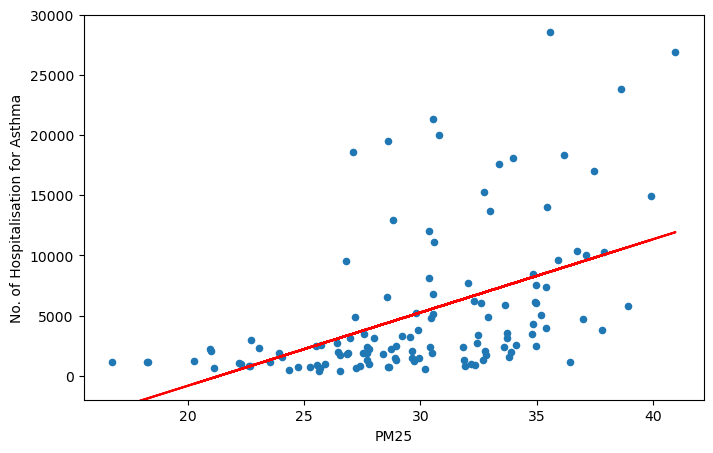

Correlation between PM25 density and hopsitalisation for asthma: 0.493


In [45]:
fig1 = airqual_hospital_df.plot.scatter('PM25','Hosp.', figsize=(8,5))
fig1.set_ylabel('No. of Hospitalisation for Asthma')

fig1.set_ylim((-2000,30000))

x_data = airqual_hospital_df['PM25']
y_data = airqual_hospital_df['Hosp.']


[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
y_reg = slope*x_data + intercept

plt.plot(x_data,y_reg,'r')
plt.show()

print(f"Correlation between PM25 density and hopsitalisation for asthma: {rvalue:.3f}")